In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Packages

In [3]:
# misc
import os
import time

# computation & data wrangling
import numpy as np
# import scipy as sp
import pandas as pd
# import re

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

# preprocessing
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Neural Network
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.regularizers import L1
# from tensorflow.keras.callbacks import EarlyStopping

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

# metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve

# Read Data

Link to dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [4]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
# expand output display to see all columns of a pandas DataFrame
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
# summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# detect missing values
# df.isna() is equivalent to df.isnull()
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no variables with missing entries.

# Data Cleaning

In [8]:
# summary of df: dtype, number of unique values, and unique values of each column
df_summary = pd.DataFrame(data=[df.dtypes, df.nunique(), df.apply(lambda col: col.unique())],
                          columns=df.columns,
                          index=['dtype', 'n_unique', 'unique_values'])

df_summary.transpose()

,dtype,n_unique,unique_values
Age,int64,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
Attrition,object,2,"[Yes, No]"
BusinessTravel,object,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
DailyRate,int64,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
Department,object,3,"[Sales, Research & Development, Human Resources]"
DistanceFromHome,int64,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
Education,int64,5,"[2, 1, 4, 3, 5]"
EducationField,object,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
EmployeeCount,int64,1,[1]
EmployeeNumber,int64,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


`EmployeeCount`, `Over18`, `StandardHours` have only one unique values, and `EmployeeNumber` has 1470 unique values. We will drop these features.

In [9]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

Notice that `BusinessTravel` is an ordinal variable with categories 'Non-Travel' < 'Travel_Rarely' < 'Travel_Frequently'. We will perform ordinal encoding.

In [10]:
df = df.replace({'BusinessTravel': {'Non-Travel':1,
                                    'Travel_Rarely':2,
                                    'Travel_Frequently':3}
                 })

# Data Understanding

In [11]:
# get all feature names
feature_names = df.drop(columns='Attrition').columns.to_list()
feature_names

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

## Categorical Features

Note that for **categorical** features, we have both **nominal** and **ordinal** variables.
- nominal features: variables without any order or quantitative value.
    - e.g. Marital status (Single, Widowed, Married) 
- ordinal features: natural ordering where a number is present in some kind of order by their position on the scale.
    - e.g. Letter grades in the exam (A, B, C, D, etc.)

### Nominal Features

In [12]:
# list of nominal features
nominal_features = df.drop(columns=['Attrition']).select_dtypes(include=['object']).columns.tolist()
nominal_features

['Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [13]:
# list of nominal features indices
nominal_features_idx = [feature_names.index(feature) for feature in nominal_features]
nominal_features_idx

[3, 6, 8, 12, 14, 18]

In [14]:
df[nominal_features] = df[nominal_features].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   int64   
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

### Ordinal Features

In [16]:
# dictionary where the keys are the ordinal features, and values are the mapping from integers to categories
ordinal_features_mapping = {'BusinessTravel': {1: 'Non-Travel', 2: 'Travel_Rarely', 3: 'Travel_Frequently'},
                            'Education': {1: 'Below College', 2: 'College', 3: 'Bachelor',  4: 'Master', 5: 'Doctor'},
                            'EnvironmentSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
                            'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
                            'JobLevel': {1: 'Junior', 2: 'Mid', 3: 'Senior', 4: 'Principal', 5: 'Head'},
                            'JobSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
                            'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
                            'RelationshipSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
                            'StockOptionLevel': {0: 'Low', 1: 'Medium', 2: 'High', 3: 'Very High'},
                            'WorkLifeBalance': {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
                            }

In [17]:
# list of ordinal features
ordinal_features = list(ordinal_features_mapping.keys())
ordinal_features

['BusinessTravel',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [18]:
# dictionary where the keys are indices of the ordinal features, and values are the mapping from integers to categories
ordinal_names = {feature_names.index(feature): ordinal_features_mapping[feature] for feature in ordinal_features}
ordinal_names

{1: {1: 'Non-Travel', 2: 'Travel_Rarely', 3: 'Travel_Frequently'},
 5: {1: 'Below College',
  2: 'College',
  3: 'Bachelor',
  4: 'Master',
  5: 'Doctor'},
 7: {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
 10: {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
 11: {1: 'Junior', 2: 'Mid', 3: 'Senior', 4: 'Principal', 5: 'Head'},
 13: {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
 20: {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
 21: {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
 22: {0: 'Low', 1: 'Medium', 2: 'High', 3: 'Very High'},
 25: {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}}

## Numerical Features

In [19]:
numerical_features = [feature for feature in feature_names if feature not in nominal_features + ordinal_features]
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Exploratory Data Analysis

## Distribution of Target Variable

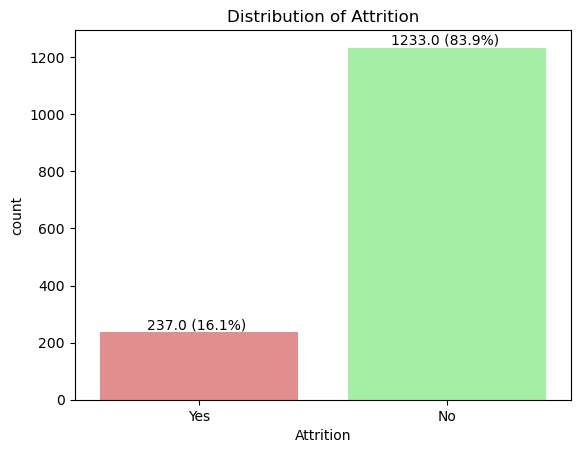

In [20]:
ax = sns.countplot(data=df, x='Attrition', palette=['lightcoral', "palegreen"])
ax.set_title('Distribution of Attrition')

for p in ax.patches:
    count = p.get_height()
    total = len(df)
    ax.annotate(f'{count} ({round(count/total * 100, 1)}%) ', 
                xy = (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext = (0, 5), 
                textcoords = 'offset points', 
                ha = 'center', 
                va = 'center')

## Distribution of Features

In [21]:
def plot_count_and_line(dataframe, feature_name, target_name, display_table=False):
    sns.set(style="ticks", rc={"lines.linewidth": 1})
    
    cross_table = pd.crosstab(dataframe[feature_name], dataframe[target_name])
    cross_table['Attrition %'] = cross_table['Yes'] / (cross_table['Yes'] + cross_table['No']) * 100
    if display_table:
        display(cross_table)

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()
    ax2.set(ylim=(0,75))

    # count plot
    sns.countplot(data=dataframe, x=feature_name, hue=target_name, palette=['lightcoral', "palegreen"], ax=ax1)
    for p in ax1.patches:
        ax1.annotate(p.get_height(), 
                     xy = (p.get_x() + p.get_width() / 2., p.get_height()), 
                     xytext = (0, 5), 
                     textcoords = 'offset points', 
                     ha = 'center', 
                     va = 'center')
        
    # line plot
    feature_categories = cross_table.index
    attr_percent = cross_table['Attrition %']

    sns.lineplot(data=attr_percent, marker='o', sort=False, color='blue', label='Attrition %', ax=ax2)
    for i in range(len(feature_categories)):
        plt.annotate(round(attr_percent[i], 2), 
                     xy=(feature_categories[i], round(attr_percent[i], 2)), 
                     xytext = (0, 5),
                     textcoords = 'offset points',
                     ha='center', 
                     va='bottom',
                     color='blue')

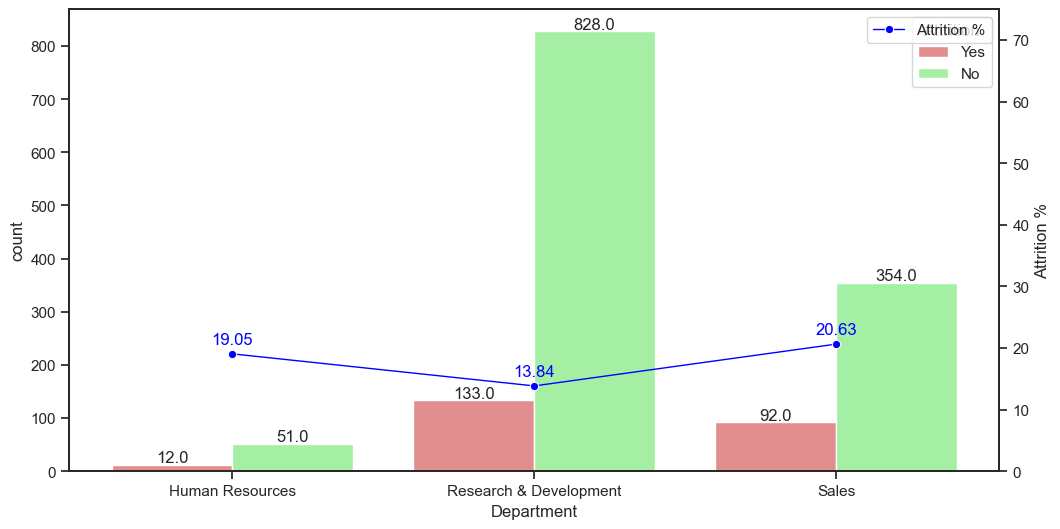

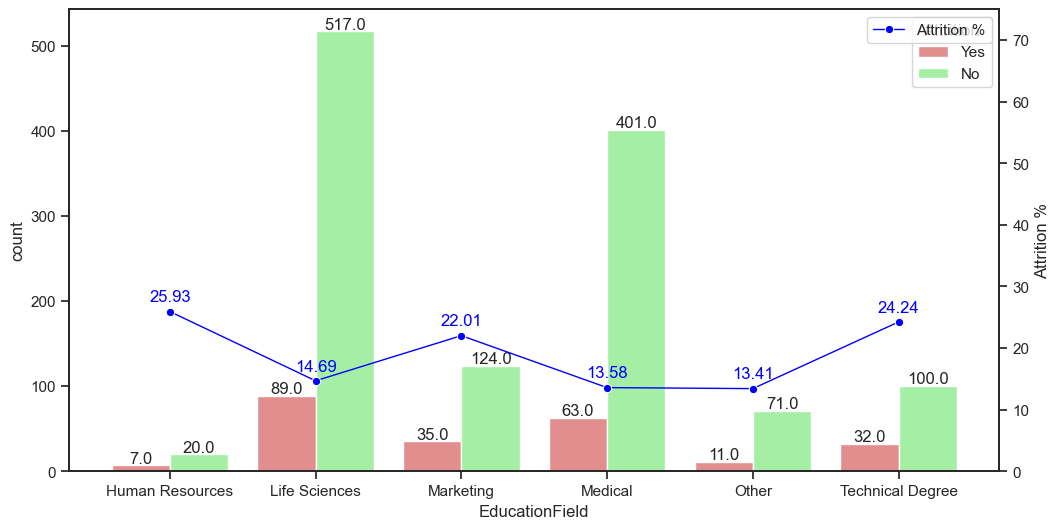

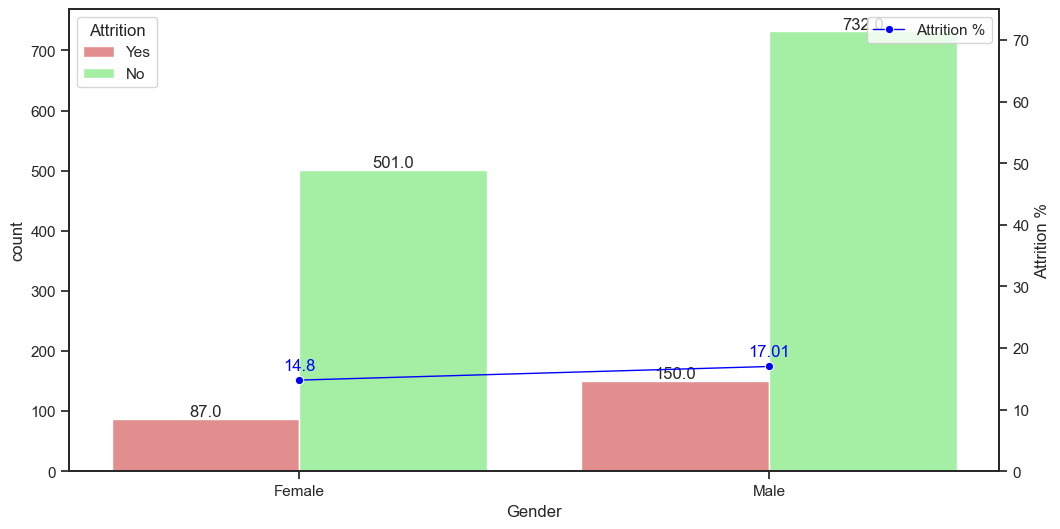

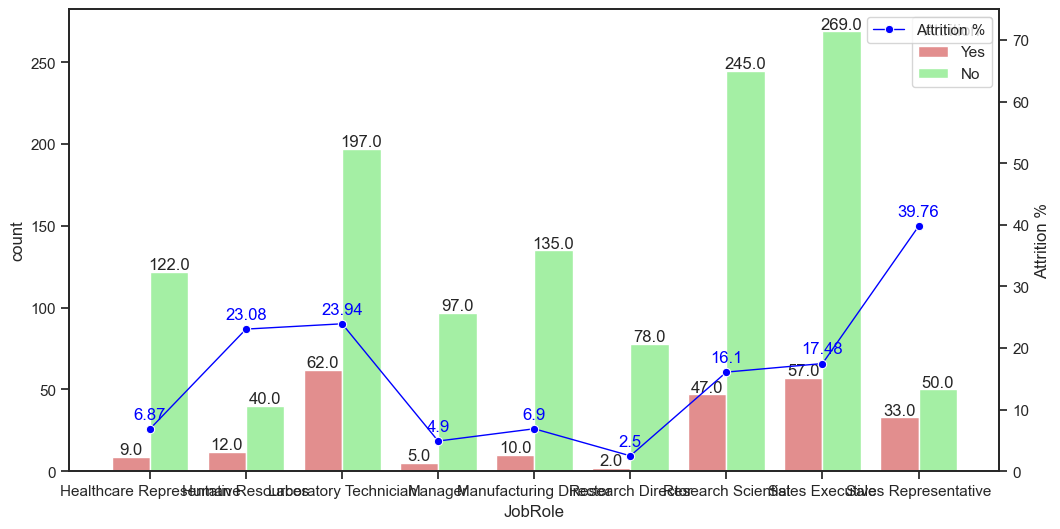

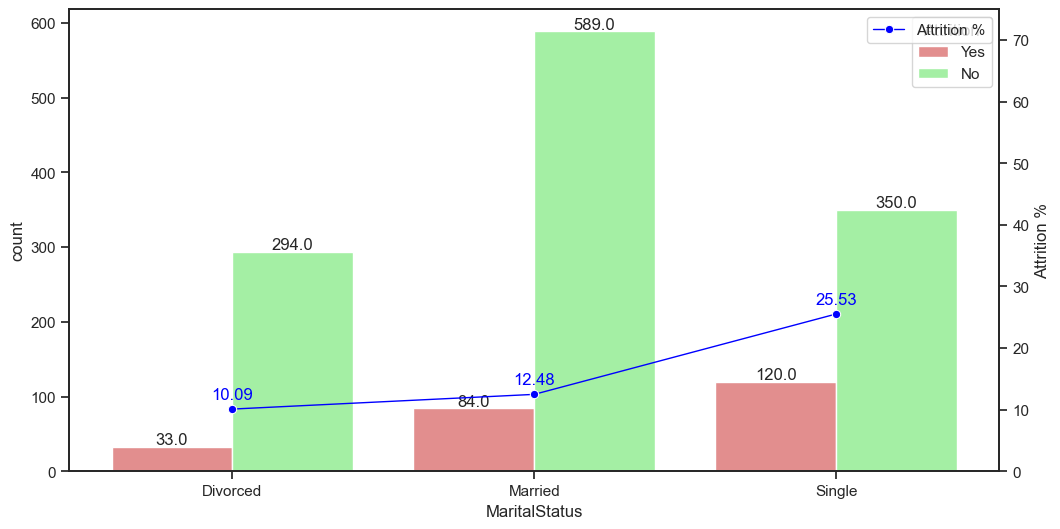

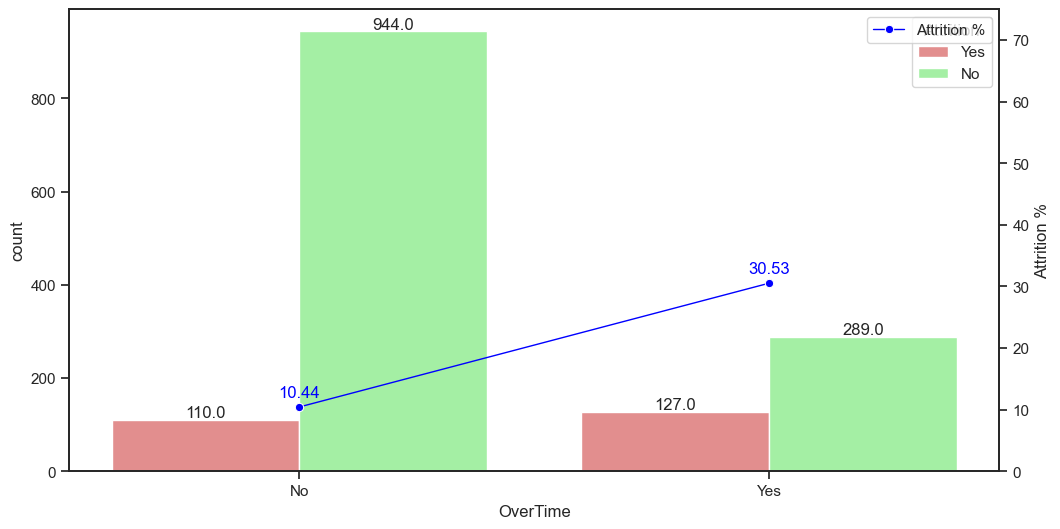

In [22]:
for feature in nominal_features:
    plot_count_and_line(df, feature, 'Attrition')

In [23]:
def plot_count_and_point(dataframe, feature_name, target_name, display_table=False):
    sns.set(style="ticks", rc={"lines.linewidth": 1})

    cross_table = pd.crosstab(dataframe[feature_name], dataframe[target_name])
    cross_table['Attrition %'] = cross_table['Yes'] / (cross_table['Yes'] + cross_table['No']) * 100
    if display_table:
        display(cross_table)

    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax2 = ax1.twinx()
    ax2.set(ylim=(0,75))

    # count plot
    sns.countplot(data=dataframe, x=feature_name, hue=target_name, palette=['lightcoral', "palegreen"], ax=ax1)
    for p in ax1.patches:
        ax1.annotate(round(np.nan_to_num(p.get_height(), 0)), 
                     xy = (p.get_x() + p.get_width() / 2., p.get_height()), 
                     xytext = (0, 5), 
                     textcoords = 'offset points', 
                     ha = 'center', 
                     va = 'center')
        
    # point plot
    feature_categories = cross_table.index
    attr_percent = cross_table['Attrition %']

    sns.pointplot(x=feature_categories, y=attr_percent, markers='o', color='blue', label='Attrition %', ax=ax2)
    for x, y in zip(ax2.get_xticks(), attr_percent):
        ax2.text(x, y, round(y, 2), color='blue')

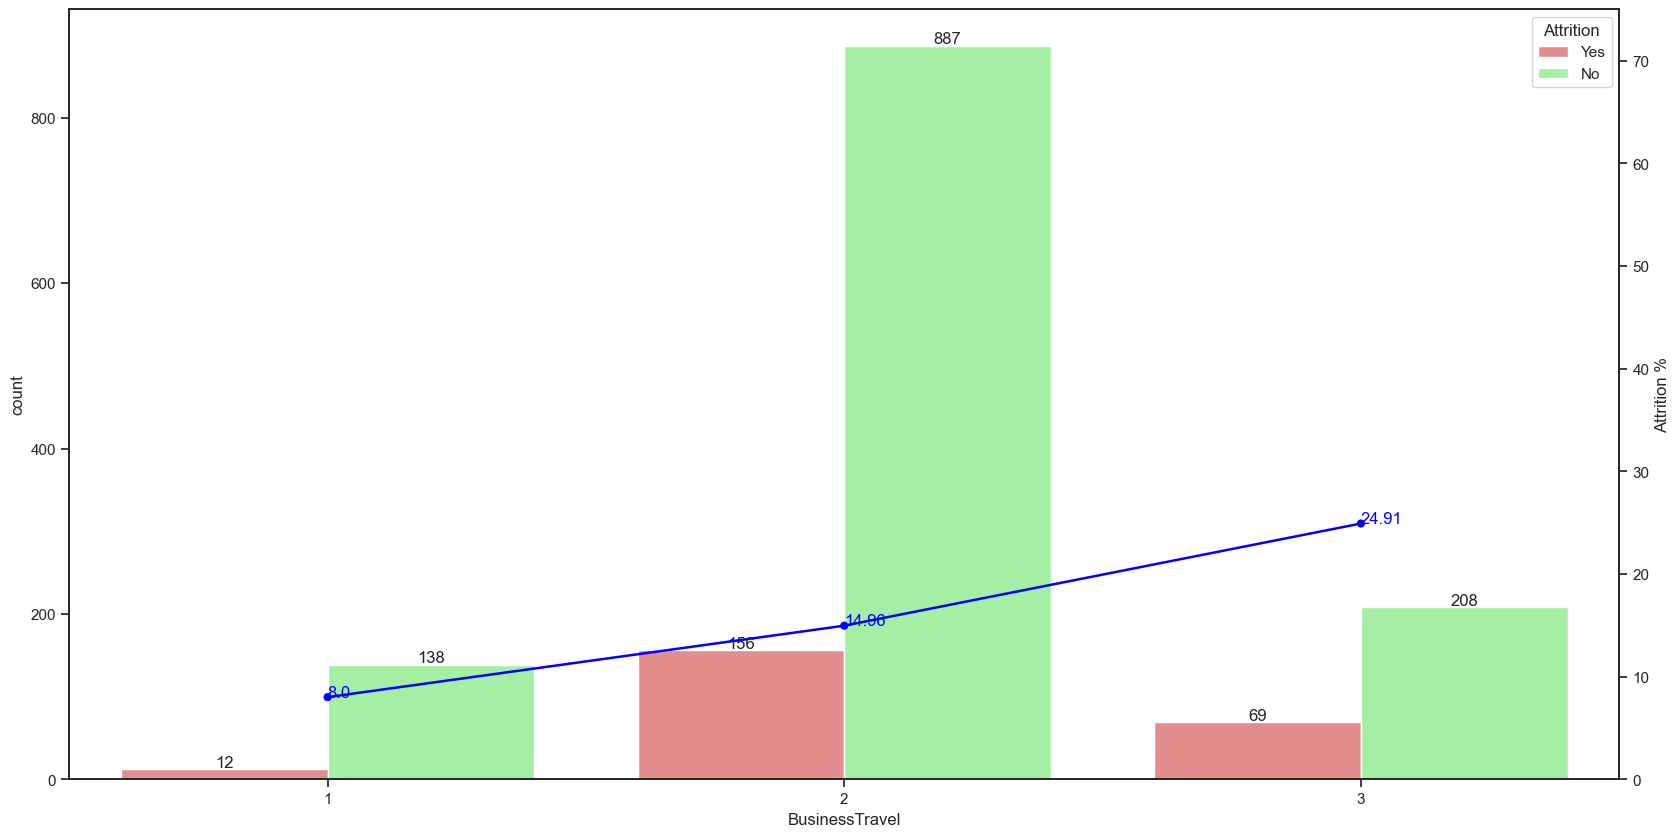

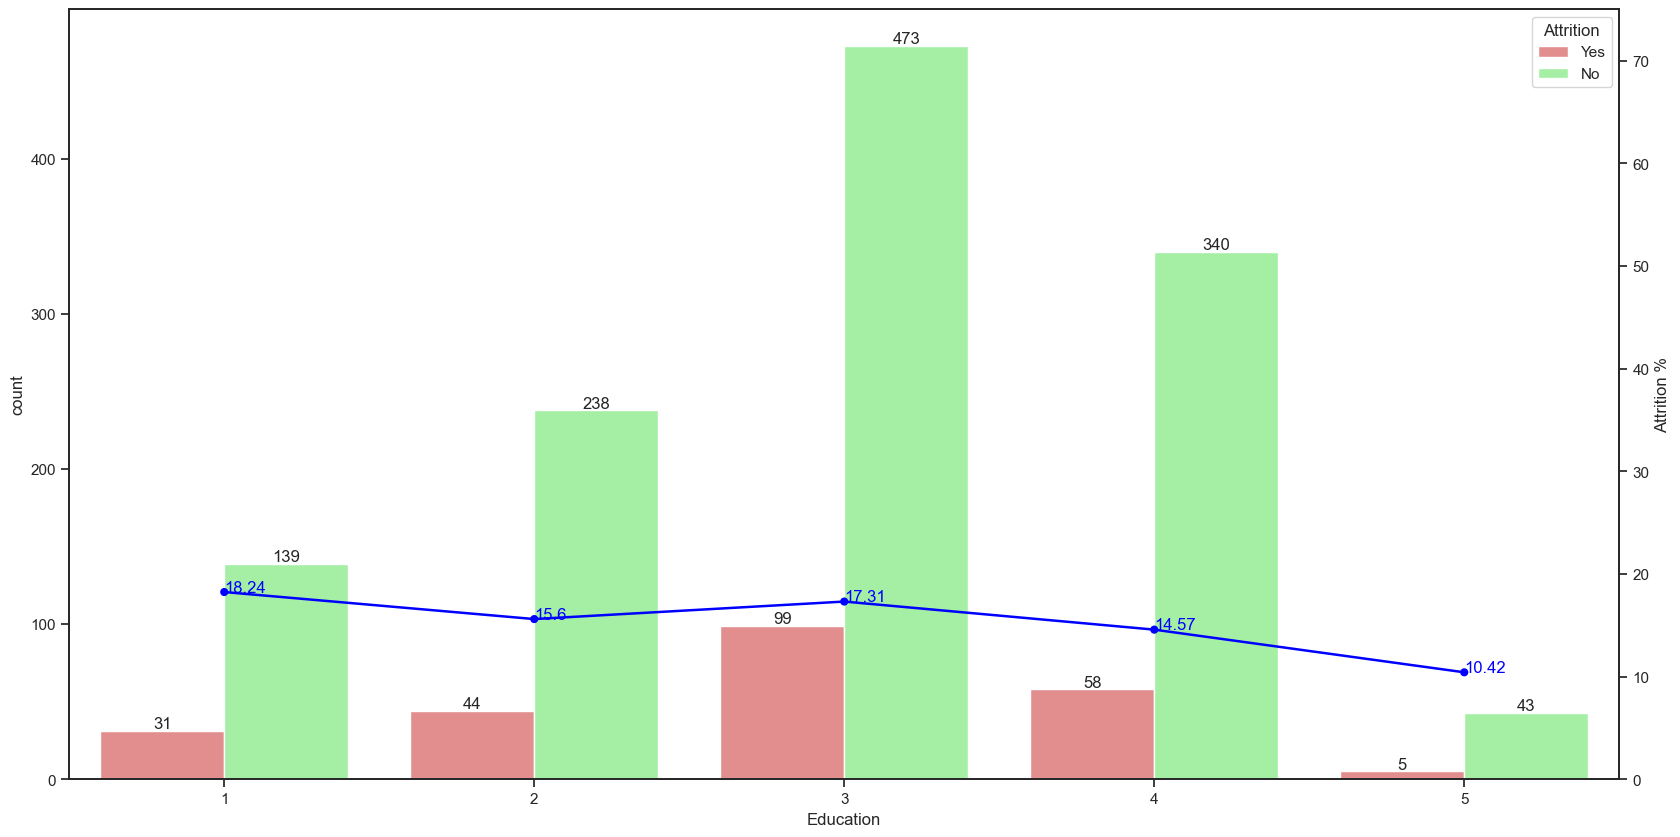

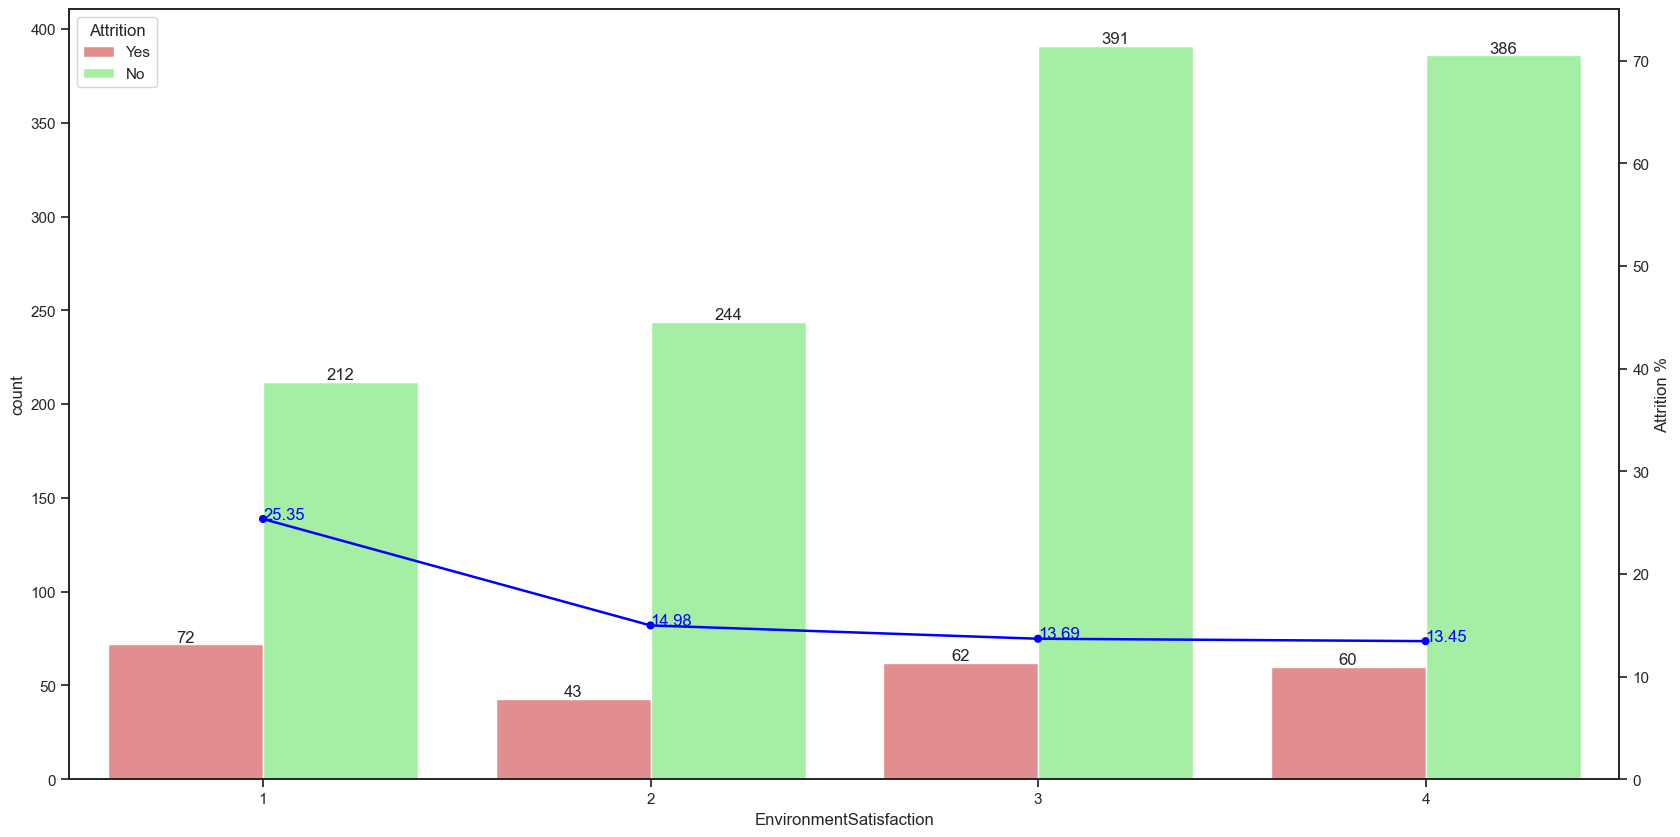

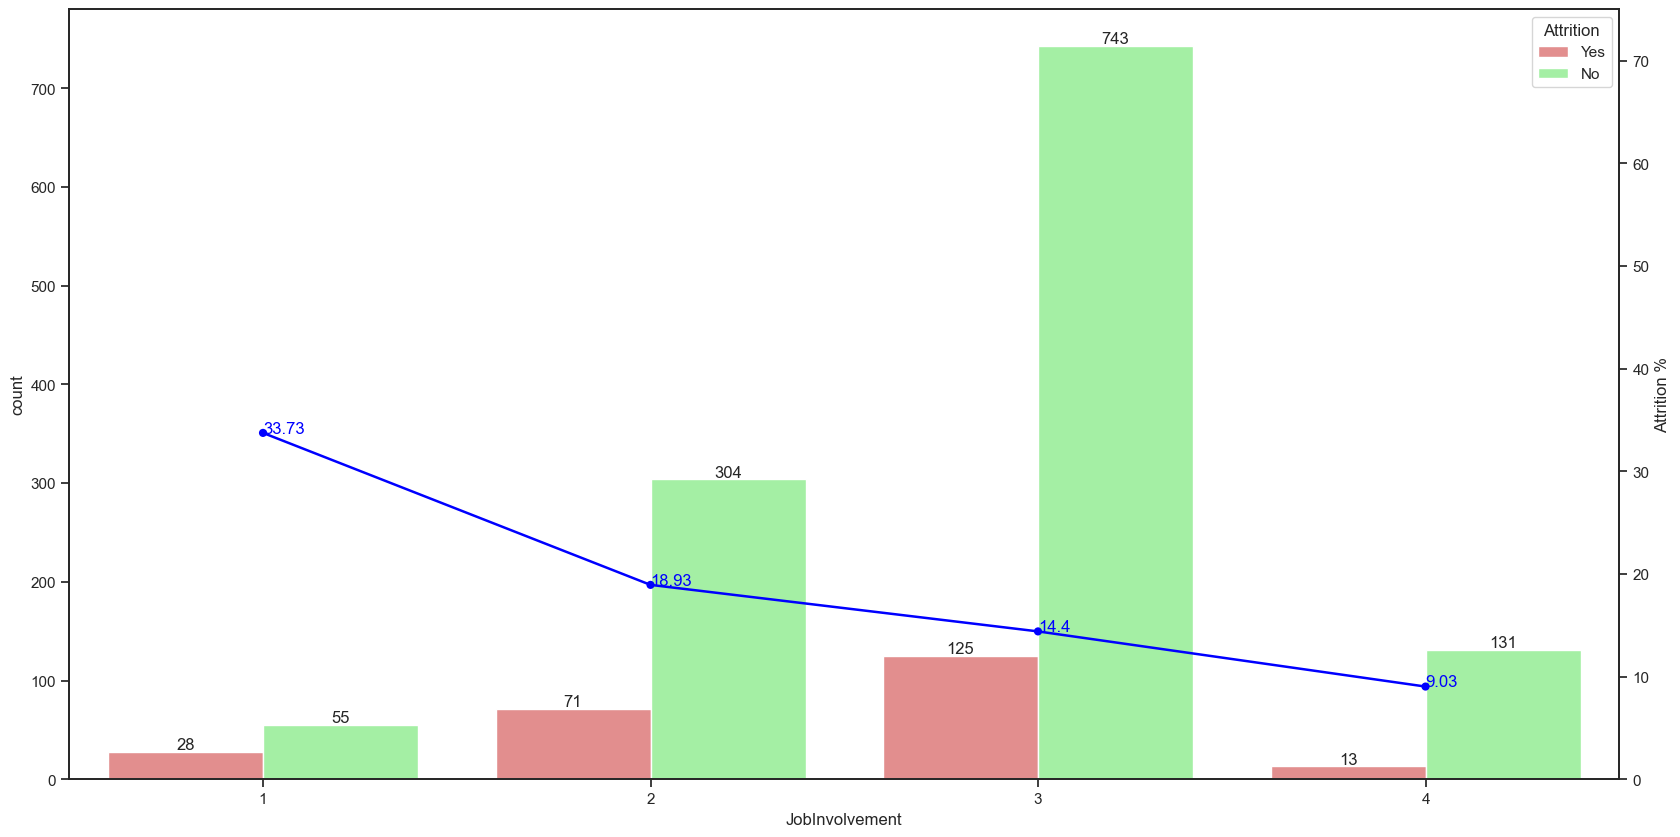

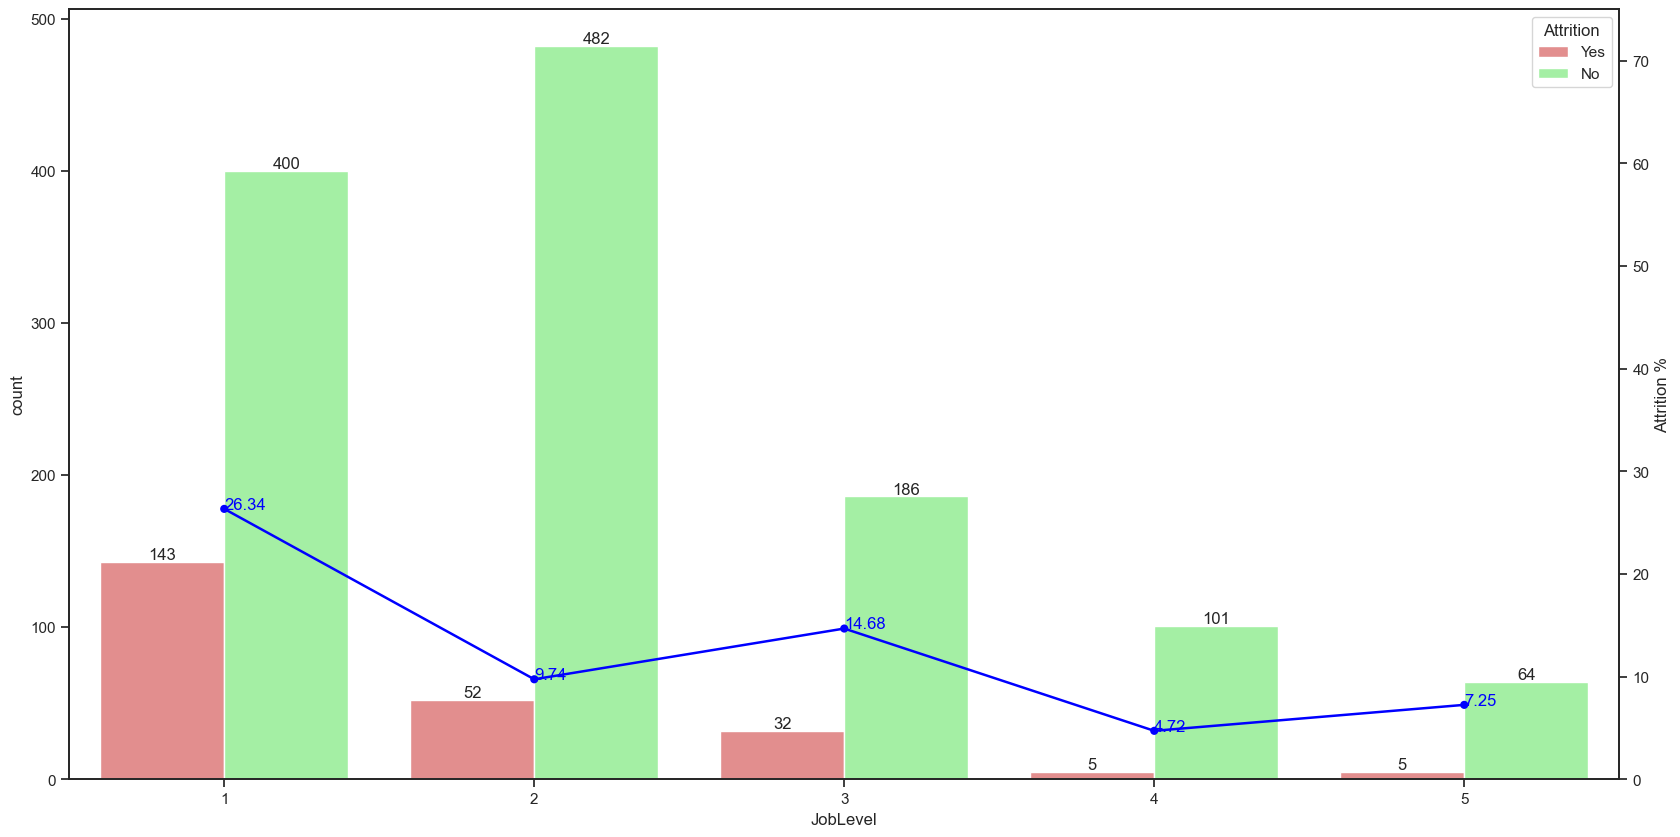

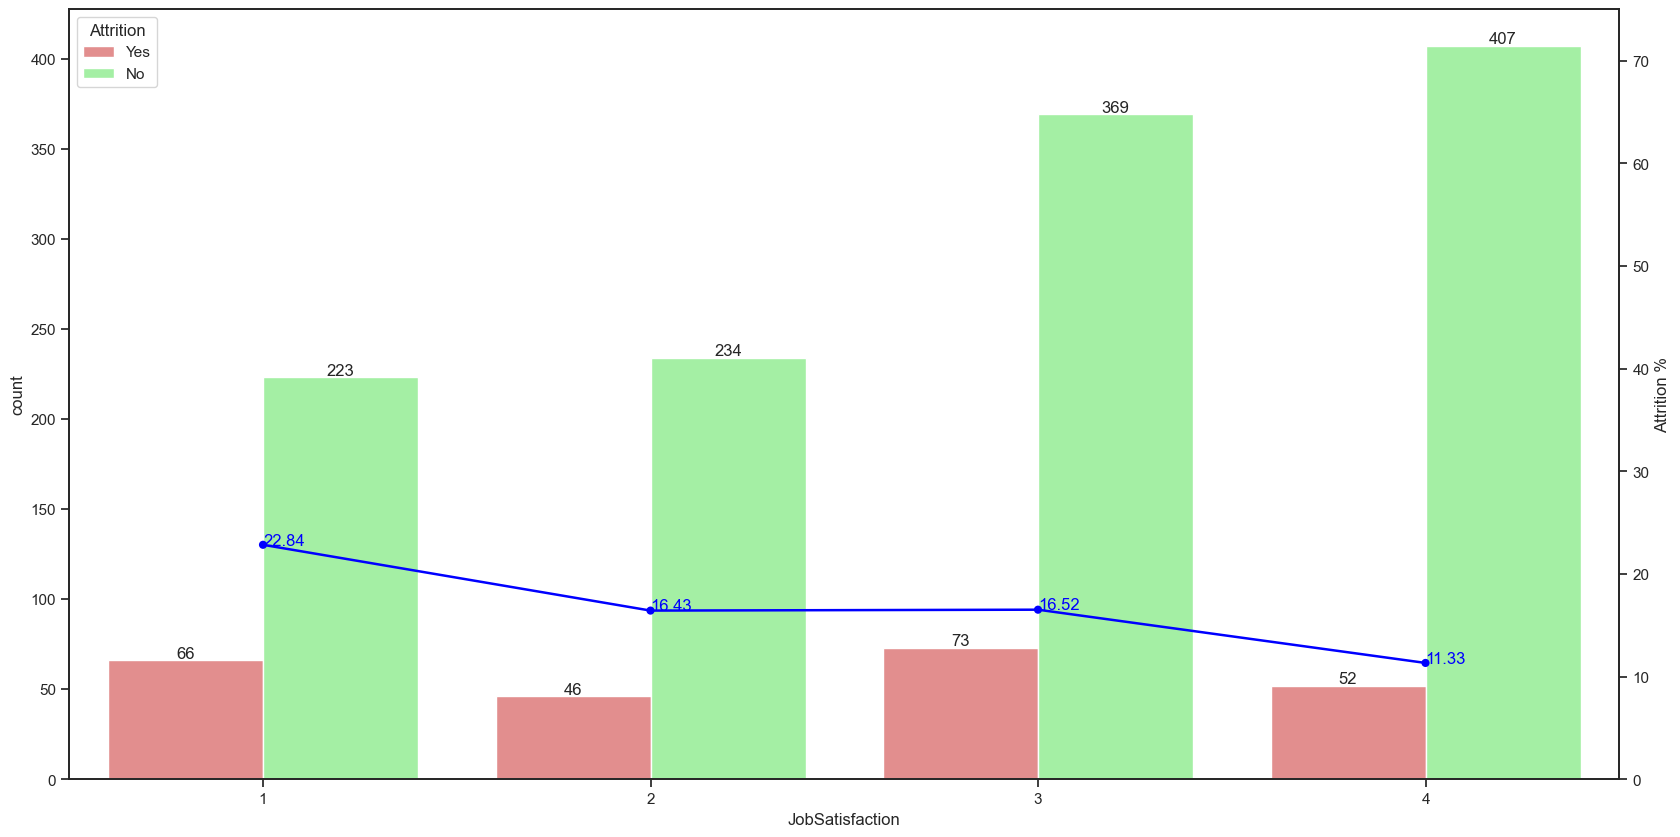

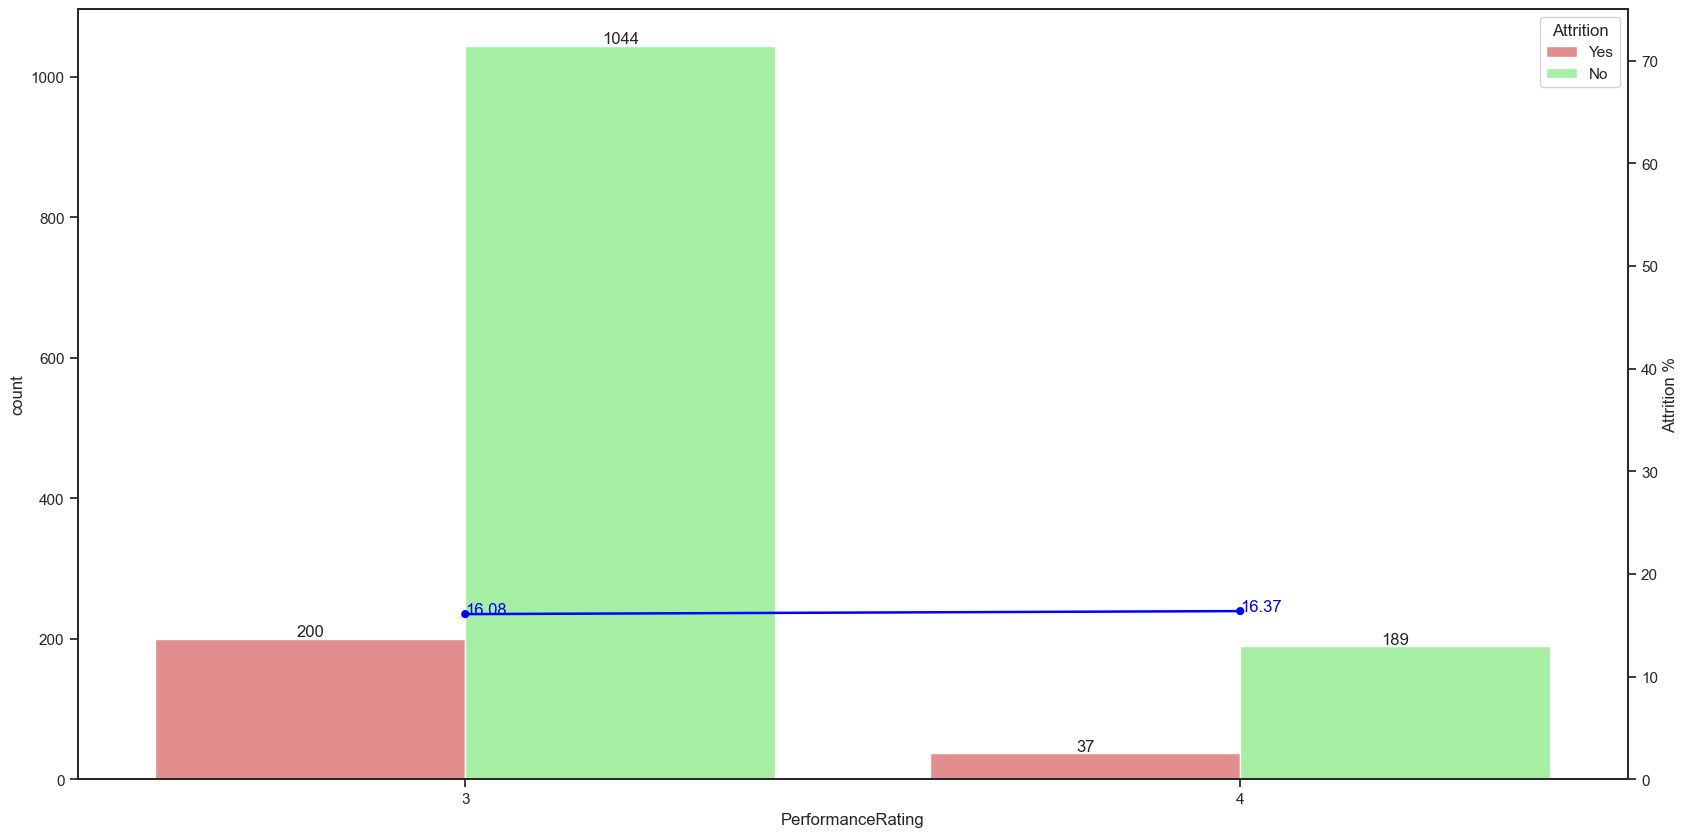

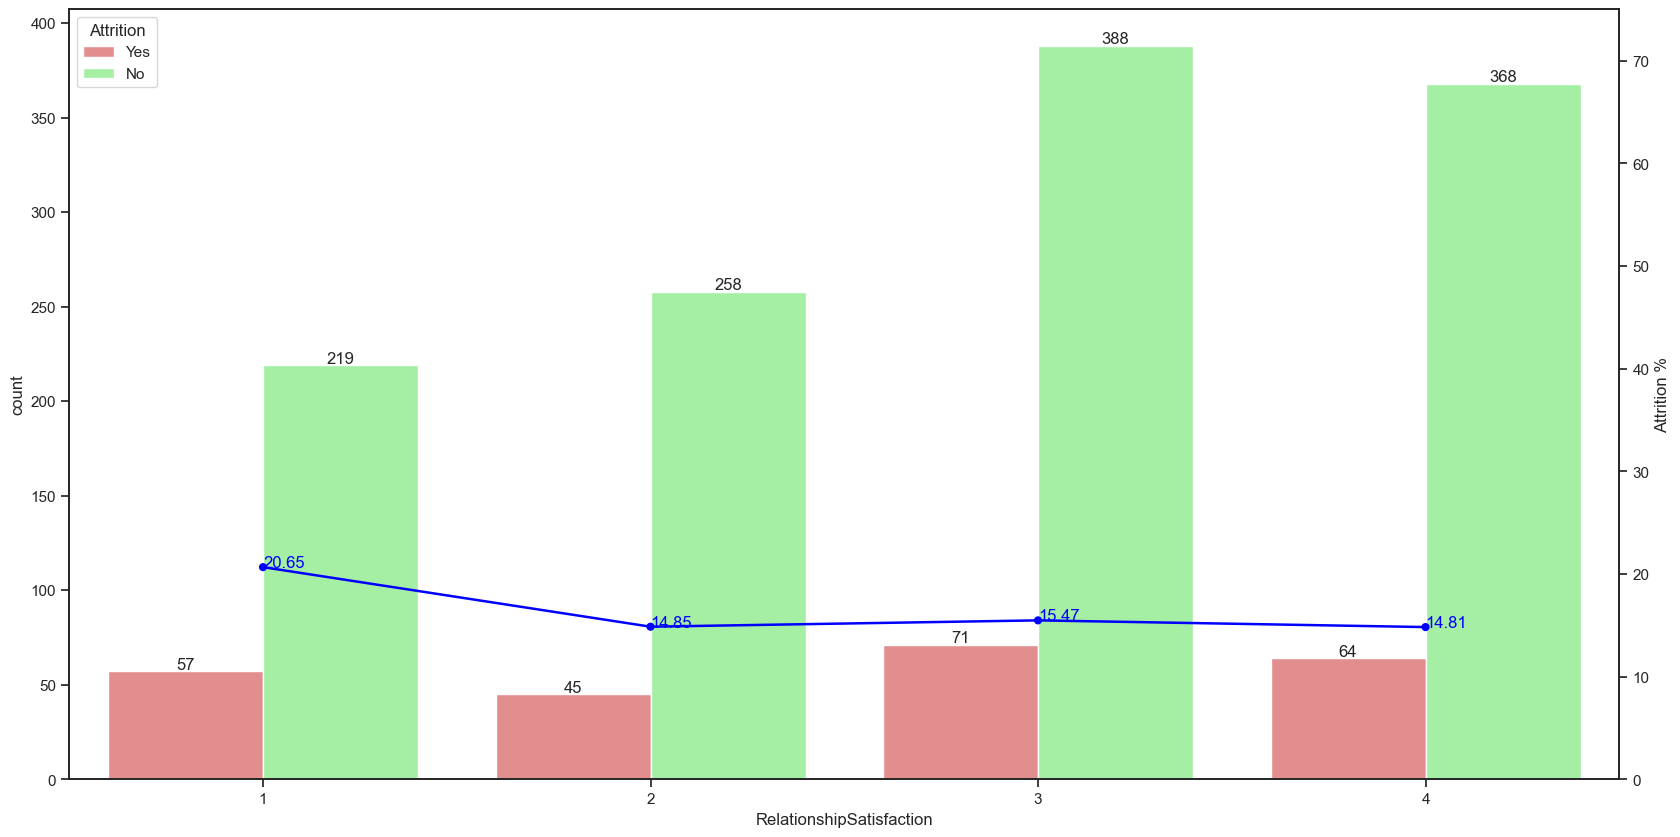

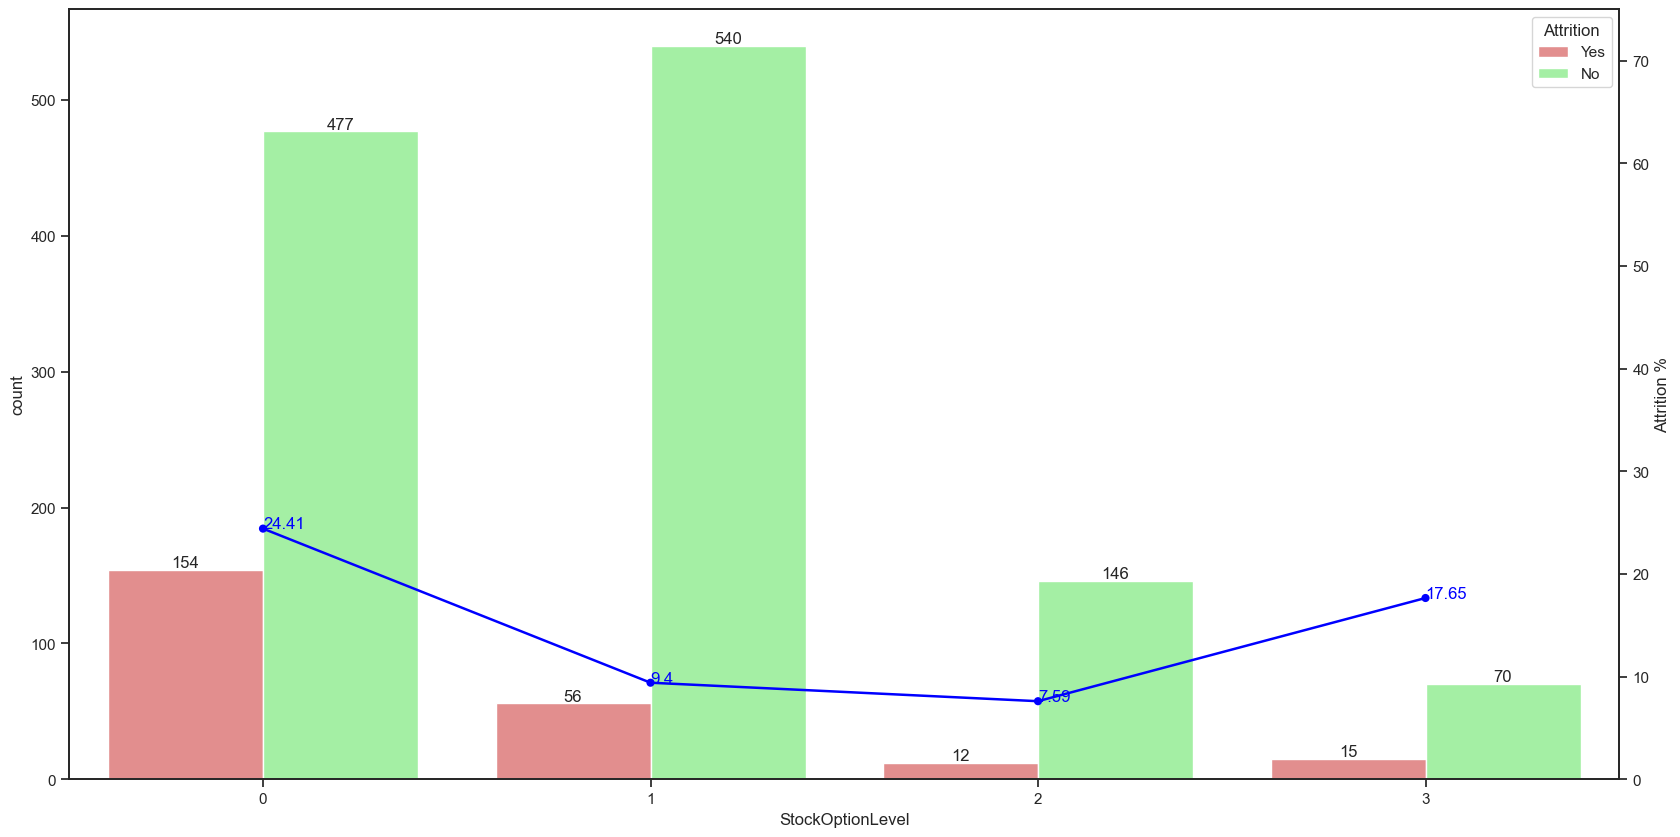

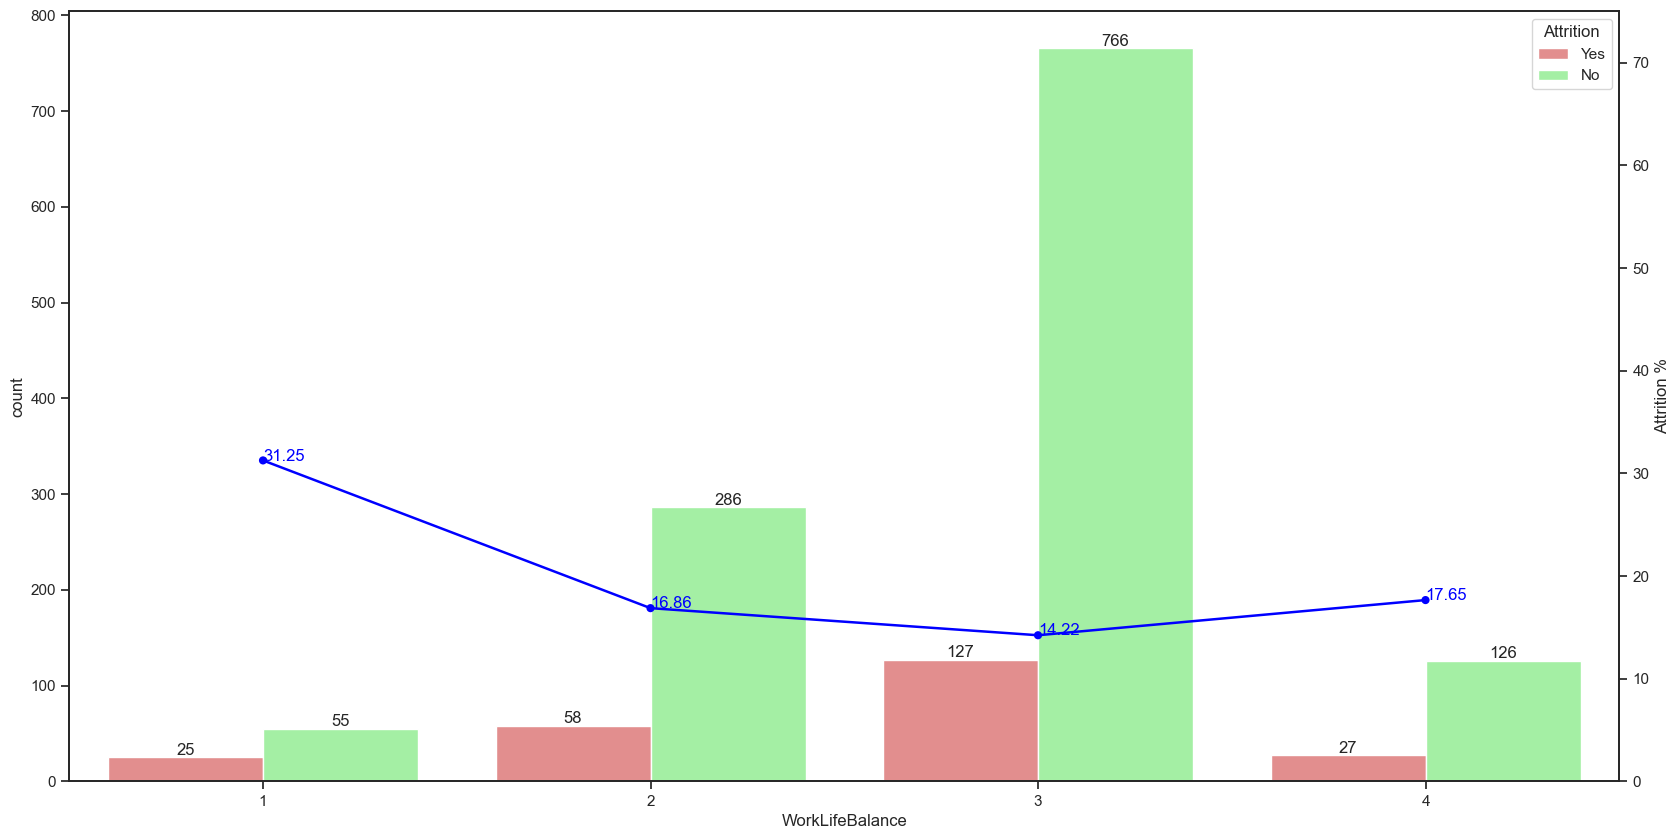

In [24]:
for feature in ordinal_features:
    plot_count_and_point(df, feature, 'Attrition')

In [25]:
def plot_distribution(dataframe, feature_name, target_name):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=dataframe, x=feature_name, hue=target_name, bins=20, kde=True, palette=['lightcoral', "palegreen"], ax=ax)

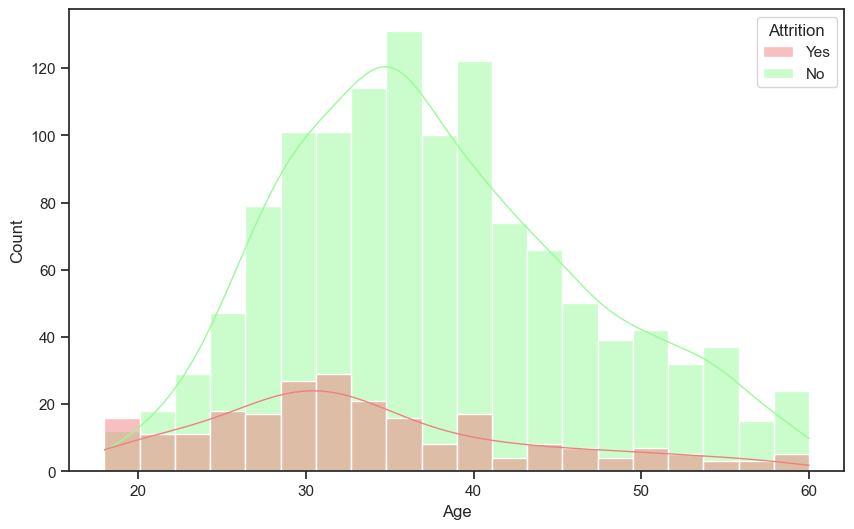

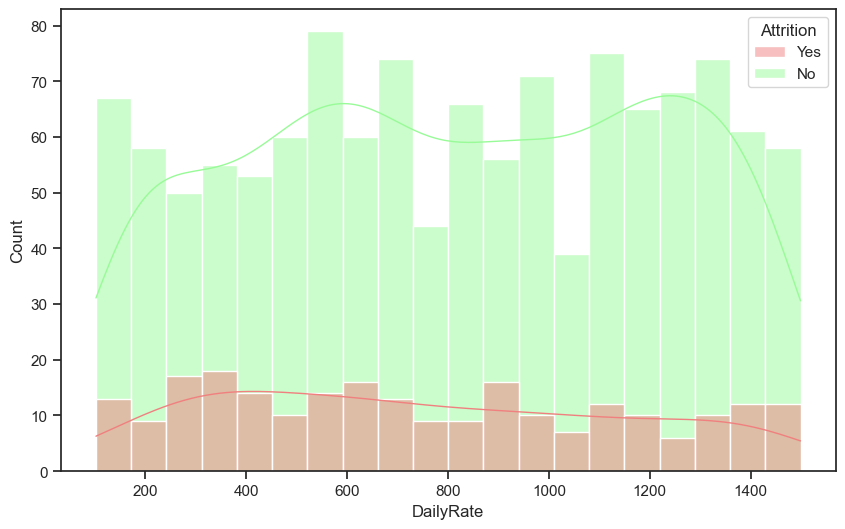

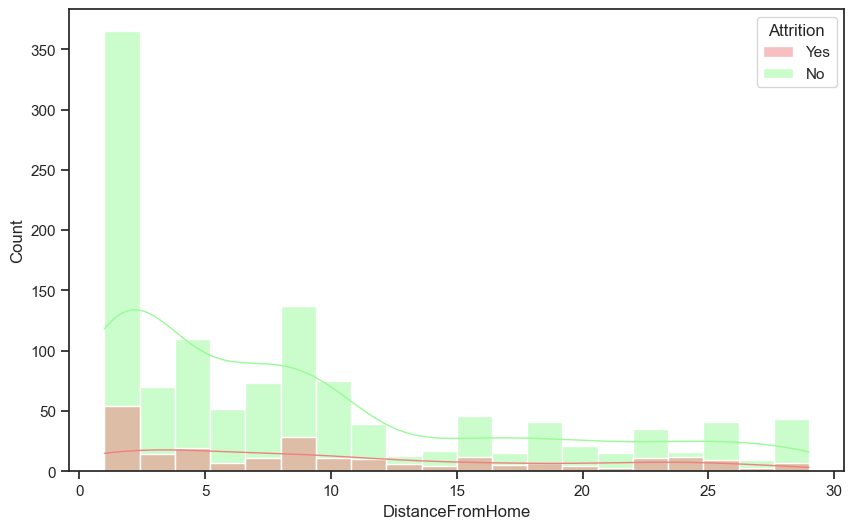

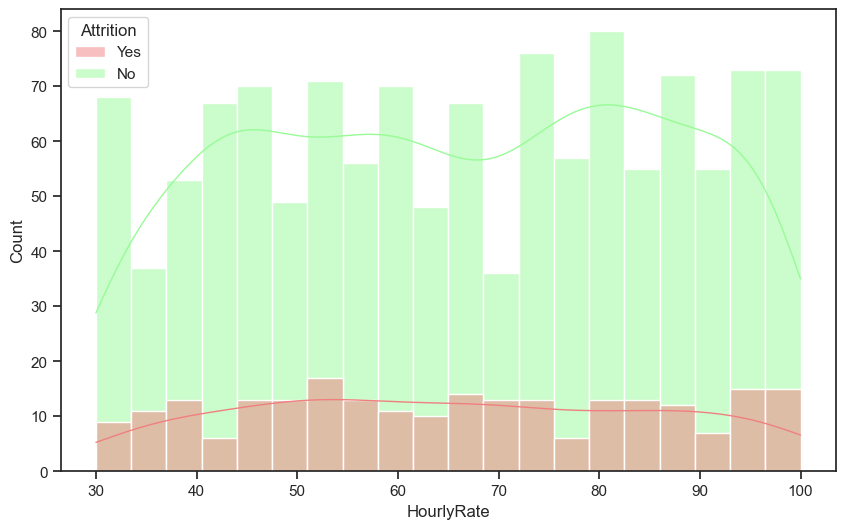

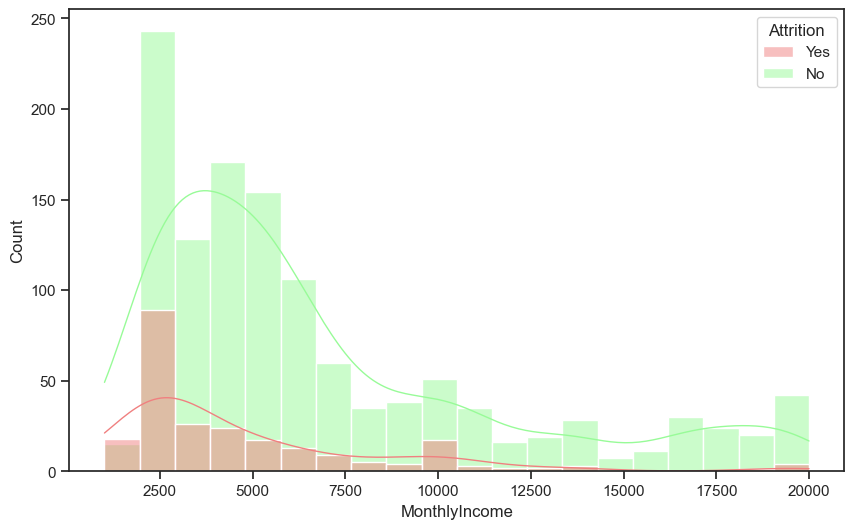

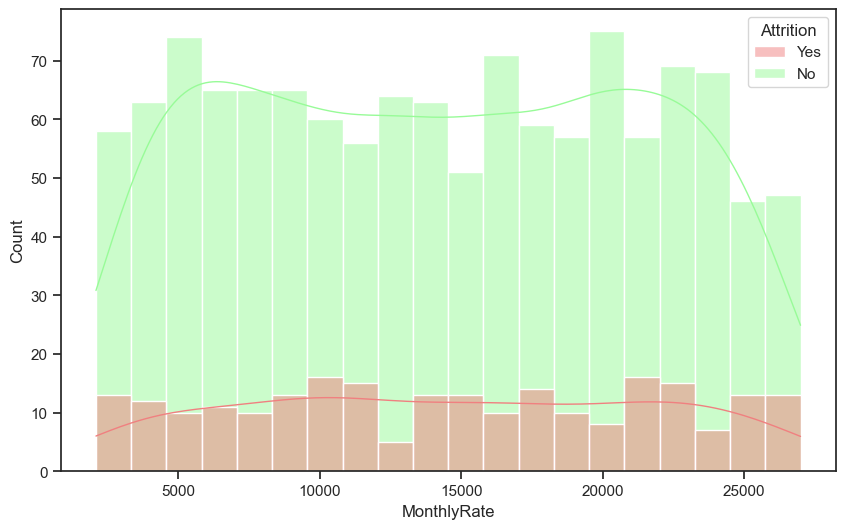

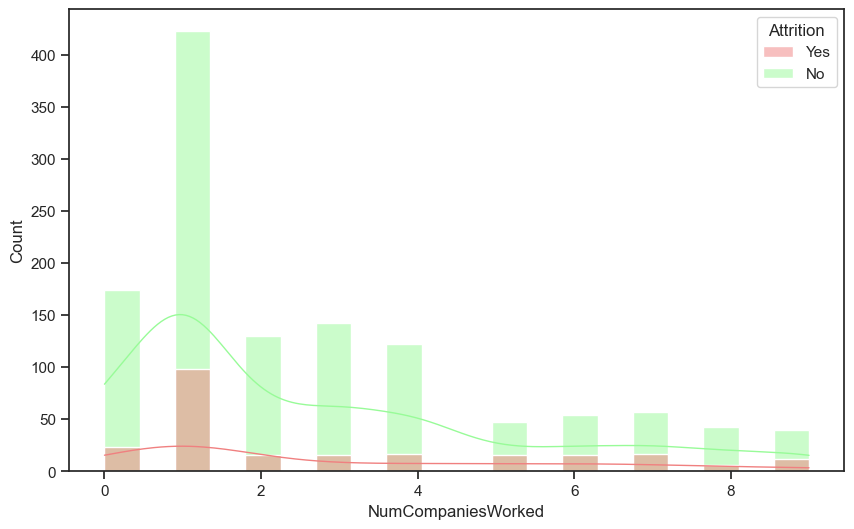

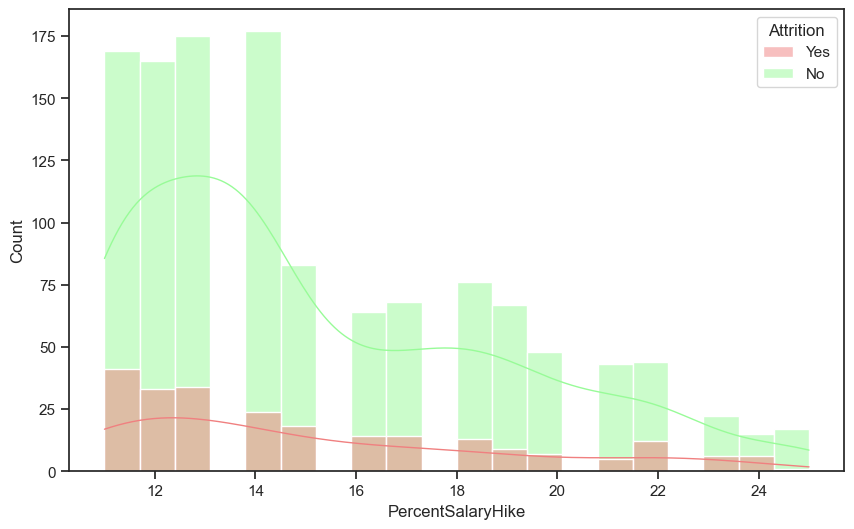

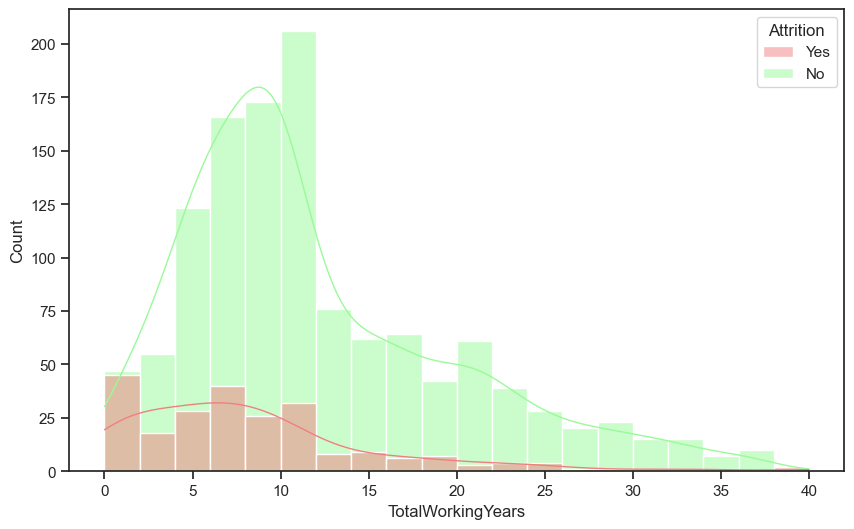

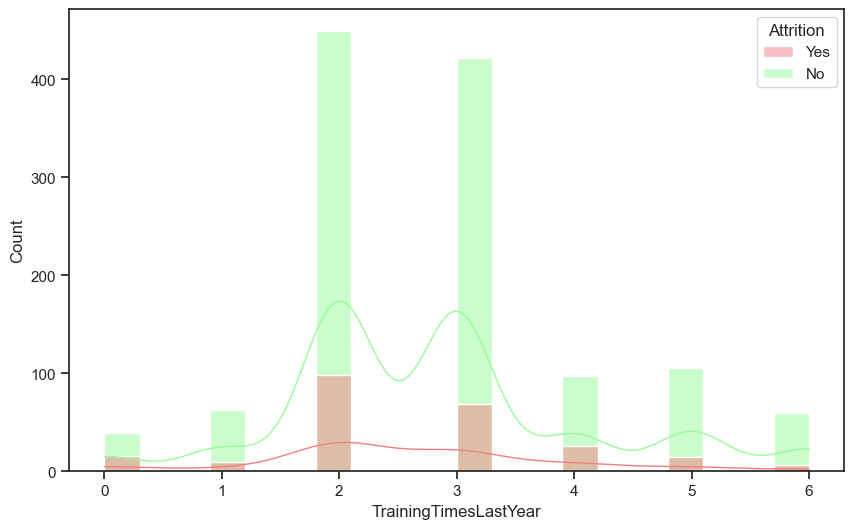

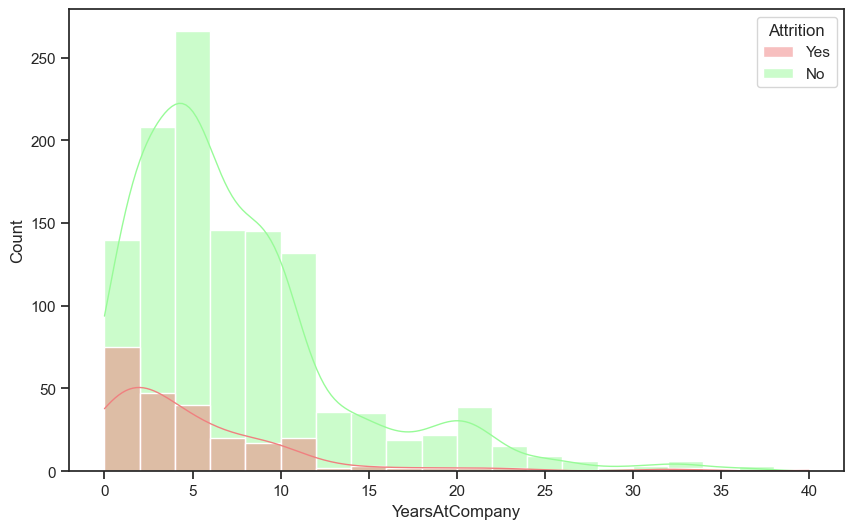

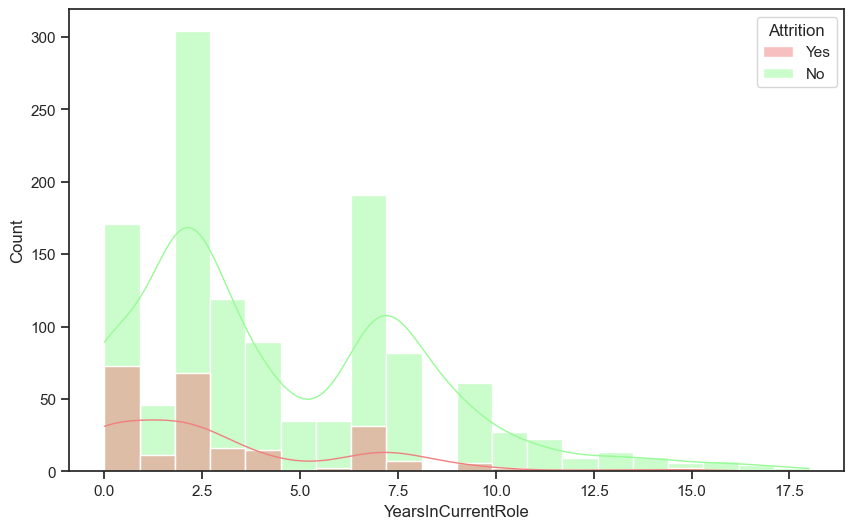

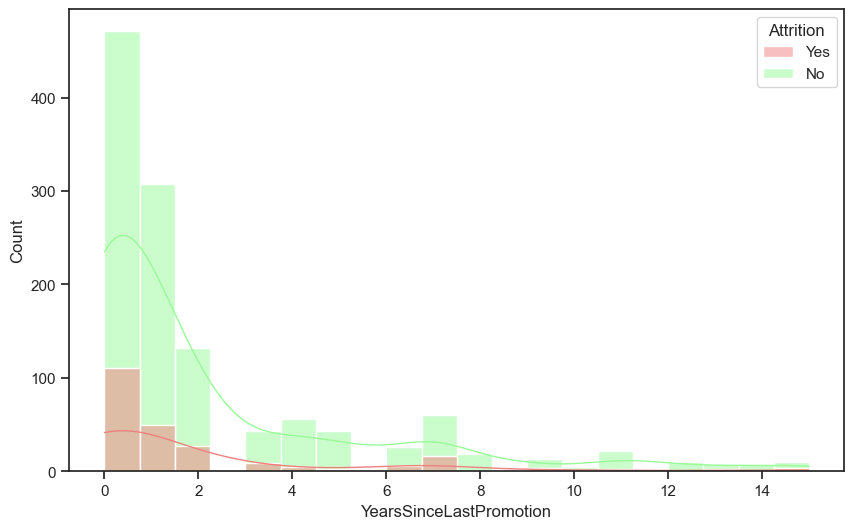

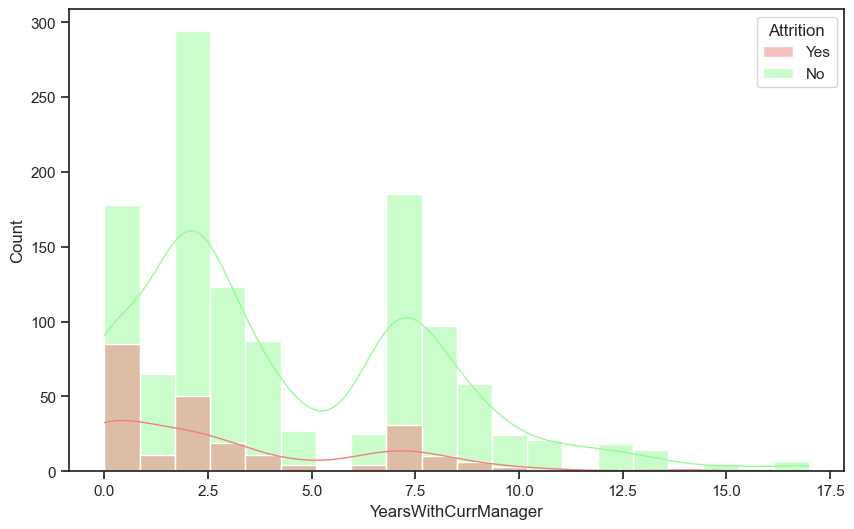

In [26]:
for feature in numerical_features:
    plot_distribution(df, feature, 'Attrition')

## Correlation Matrix

C:\Users\User\AppData\Local\Temp\ipykernel_13296\770700382.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = round(df.corr(), 2)


<Axes: >

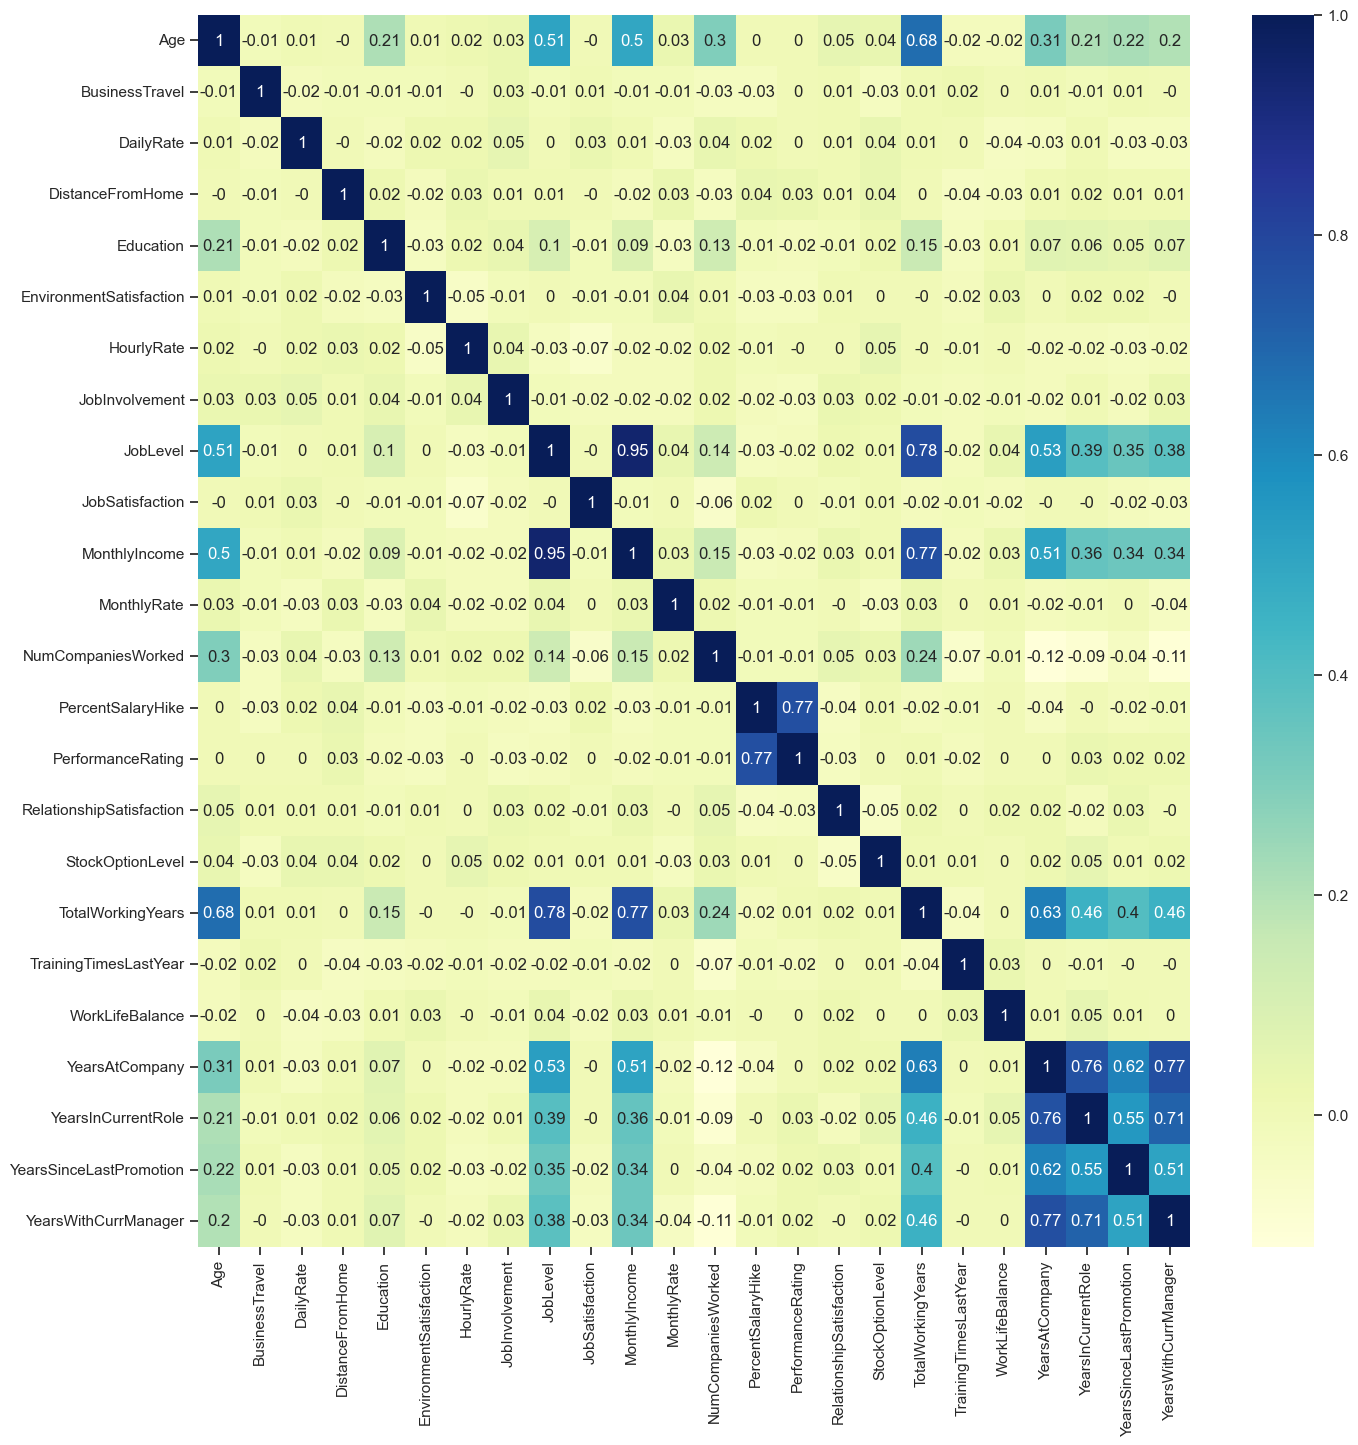

In [27]:
corr_matrix = round(df.corr(), 2)

fix, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(data=corr_matrix, annot=True, cmap="YlGnBu", ax=ax)

# Data Preprocessing

## Train-Test-Split

In [28]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# shape of train set, test set
print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")

Shape of X_train: (1102, 30), Shape of y_train: (1102,)
Shape of X_test: (368, 30), Shape of y_test: (368,)


In [29]:
print("Train set:")
print(round(y_train.value_counts(normalize=True), 4))
print()
print("Test set:")
print(round(y_test.value_counts(normalize=True), 4))

Train set:
No     0.8385
Yes    0.1615
Name: Attrition, dtype: float64

Test set:
No     0.8397
Yes    0.1603
Name: Attrition, dtype: float64


In [30]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Preprocessing Pipeline

For *numerical features*: `impute missing value` (skipped) & `standardization`

For *categorical features*: `imput missing value` (skipped) & `one hot encoding`

In [31]:
# define categorical and numerical transformers
categorical_transformer = Pipeline(steps=[
    # ('SimpleImputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop=None))
])

numerical_transformer = Pipeline(steps=[
    # ('knnImputer', KNNImputer(n_neighbors=3, weights="uniform")),
    ('scaler', StandardScaler())
])


#  dispatch object columns to the categorical_transformer and remaining columns to numerical_transformer
preprocessor = ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, make_column_selector(dtype_include="category")),
    ('passthrough', 'passthrough', make_column_selector(dtype_exclude="category"))
])

In [32]:
# using make_column_transformer
X_train_processed = preprocessor.fit_transform(X_train)
print(f"Shape of X_train_processed after preprocessing: {X_train_processed.shape}")

X_test_processed = preprocessor.transform(X_test)
print(f"Shape of X_test_processed after preprocessing: {X_test_processed.shape}")

Shape of X_train_processed after preprocessing: (1102, 49)
Shape of X_test_processed after preprocessing: (368, 49)


In [33]:
LE = LabelEncoder()
y_train_processed = LE.fit_transform(y_train)
print(f"Shape of y_train_processed after preprocessing: {y_train_processed.shape}")

y_test_processed = LE.transform(y_test)
print(f"Shape of y_test_processed after preprocessing: {y_test_processed.shape}")

Shape of y_train_processed after preprocessing: (1102,)
Shape of y_test_processed after preprocessing: (368,)


In [34]:
print(f"y_train after preprocessing: {y_train_processed}")
print(f"y_train before preprocessing: {LE.inverse_transform(y_train_processed)}")

y_train after preprocessing: [0 0 1 ... 0 0 0]
y_train before preprocessing: ['No' 'No' 'Yes' ... 'No' 'No' 'No']


In [35]:
X_train_processed

array([[ 0.,  1.,  0., ...,  6.,  2., 11.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  0., ...,  3.,  1.,  1.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  2.,  2.]])

In [36]:
type(X_train_processed)

numpy.ndarray

We shall investigate why `X_train_processed` is a `np.ndarray`, and not a `scipy.sparse.csr.csr_matrix`.

In [37]:
# proportion of nonzero entries in the array
np.count_nonzero(X_train_processed) / X_train_processed.size

0.5840957072484166

Because the proportion of nonzero entries in the array = 0.584 > the `sparse_threshold` default value of 0.3, the output is stored as a `np.ndarray`.

If we set `sparse_threshold = 0.7` when instantiating the `ColumnTransformer` object, we see that the output is stored as a `sparse.csr.csr_matrix` instead.

# Model

In [38]:
def performance_metrics(model, X, y):

    y_pred = model.predict(X)
    
    cm = confusion_matrix(y, y_pred)
    cm_df = pd.DataFrame(data=cm, 
                        index=['True Negative: 0', 'True Positive: 1'], 
                        columns=['Pred Negative: 0', 'Pred Positive: 1'])
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')

    print("\n" "#=====#=====#===== Classification Report =====#=====#=====#")
    print(classification_report(y, y_pred))

In [39]:
def plot_evaluation_curves(model, X_train, X_test, y_train, y_test):
    performance_metrics = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    
    for dataset, X, y in [('train', X_train, y_train), ('test', X_test, y_test)]:
        
        #=====#=====#=====#=====#=====
        # Compute metrics: Accuracy, F1, ROC AUC, Average Precision (AP)
        #=====#=====#=====#=====#=====
        performance_metrics[dataset] = {}
        
        y_pred = model.predict(X)
        y_pred_prob = model.predict_proba(X)[:, 1]
        
        # Accuracy
        accuracy = accuracy_score(y, y_pred)
        performance_metrics[dataset]['Accuracy'] = accuracy
        
        # F1
        f1 = f1_score(y, y_pred)
        performance_metrics[dataset]['F1'] = f1
        
        # ROC AUC
        roc_auc = roc_auc_score(y, y_pred_prob)
        performance_metrics[dataset]['ROC_AUC'] = roc_auc
        
        # Average Precision (AP)
        average_precision = average_precision_score(y, y_pred_prob)
        performance_metrics[dataset]['Average_Precision'] = average_precision
        
        #=====#=====#=====#=====#=====
        # Plot curves: F1 score, ROC, PRC
        #=====#=====#=====#=====#=====
        color = 'blue' if dataset == 'train' else 'orange'
        
        # F1 score
        thresholds = np.linspace(start=0, stop=1, num=100, endpoint=True)
        f1_scores = [f1_score(y, y_pred_prob >= th) for th in thresholds]
        max_f1_score_idx = np.argmax(f1_scores)
        
        ax = axs[0]
        ax.plot(thresholds, f1_scores, color=color, label=f"{dataset}, max={round(f1_scores[max_f1_score_idx], 2)} @ {round(thresholds[max_f1_score_idx], 2)}")
        # mark some thresholds
        for th in [0, 0.2, 0.4, 0.6, 0.8, 1]:
            closest_threshold_idx = np.argmin(np.abs(thresholds-th))
            marker_color = 'red' 
            ax.plot(thresholds[closest_threshold_idx], f1_scores[closest_threshold_idx], color=marker_color, marker='X', markersize=7)        
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('decision function threshold')
        ax.set_ylabel('F1')
        ax.set_title('F1 Score') 
        ax.legend(loc='lower center')
        

        # ROC
        fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
        
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f"{dataset}, ROC AUC={round(roc_auc, 2)}")
        # mark some thresholds
        for th in [0, 0.2, 0.4, 0.6, 0.8, 1]:
            closest_threshold_idx = np.argmin(np.abs(thresholds-th))
            marker_color = 'red' 
            ax.plot(fpr[closest_threshold_idx], tpr[closest_threshold_idx], color=marker_color, marker='X', markersize=7)        
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.set_title('ROC Curve') 
        ax.legend(loc='lower center')
        
        # PRC
        precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)
        
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f"{dataset}, Average Precision={round(average_precision, 2)}")
        # mark some thresholds
        for th in [0, 0.2, 0.4, 0.6, 0.8, 1]:
            closest_threshold_idx = np.argmin(np.abs(thresholds-th))
            marker_color = 'red' 
            ax.plot(recall[closest_threshold_idx], precision[closest_threshold_idx], color=marker_color, marker='X', markersize=7)        
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_title('Precision Recall Curve') 
        ax.legend(loc='lower center')
        
    
    df_performance_metrics = pd.DataFrame(performance_metrics).round(2)
    display(df_performance_metrics)
    

## Random Forests

In [40]:
RF_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {'n_estimators': [100, 500, 900], 
              'max_features': ['auto', 'sqrt'],
              'max_depth': [2, 15, None], 
              'min_samples_split': [5, 10],
              'min_samples_leaf': [1, 4], 
              'bootstrap': [True, False]
              }

In [41]:
#=====#=====#=====#=====#=====
# hyperparameter tuning
#=====#=====#=====#=====#=====
RF_search = GridSearchCV(RF_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
RF_search.fit(X_train_processed, y_train_processed)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 15, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 500, 900]},
             scoring='roc_auc', verbose=1)

In [ ]:
RF_search.best_params_

In [ ]:
RF_clf = RandomForestClassifier(**RF_search.best_params_, class_weight='balanced', random_state=42)
RF_clf.fit(X_train_processed, y_train_processed)

# Evaluation

## Random Forests

In [ ]:
performance_metrics(RF_clf, X_train_processed, y_train_processed)

In [ ]:
performance_metrics(RF_clf, X_test_processed, y_test_processed)

In [ ]:
plot_evaluation_curves(RF_clf, X_train_processed, X_test_processed, y_train_processed, y_test_processed)